# Quick start tutorial

This tutorial only shows the most basic use case on 2D images.

Let us first create a dense deformation and an affine transformation and then compose them.

In [1]:
import torch
import matplotlib.pyplot as plt

import composable_mapping as cm
from torchvision.transforms import GaussianBlur

coordinate_system = cm.CoordinateSystem.create_centered_normalized(spatial_shape=(256, 256))
deformation = cm.samplable_volume(
    GaussianBlur(kernel_size=21, sigma=7.0)(20 * torch.randn(1, 2, 256, 256)),
    coordinate_system=coordinate_system,
    data_format=cm.DataFormat.voxel_displacements(),
)
affine = cm.affine(torch.tensor([[0.7, 0.2, 0.0], [0.2, 0.9, 0.0], [0.0, 0.0, 1.0]]))
composition = deformation @ affine
grid_visualization_arguments = cm.GridVisualizationArguments(emphasize_every_nth_line=(5, 0))
cm.visualize_as_deformed_grid(deformation, arguments=grid_visualization_arguments)
plt.title("Deformation")
plt.show()
cm.visualize_to_as_deformed_grid(affine, target=coordinate_system, arguments=grid_visualization_arguments)
plt.title("Affine")
plt.show()
cm.visualize_as_deformed_grid(composition, arguments=grid_visualization_arguments)
plt.title("Composition")
plt.show()

AttributeError: partially initialized module 'composable_mapping' has no attribute 'ComposableMapping' (most likely due to a circular import)

Let us apply the composed deformation to an image and visualize the image. The mask of extrapolated regions (shown in red) is automatically generated which can then be used e.g. in loss functions.

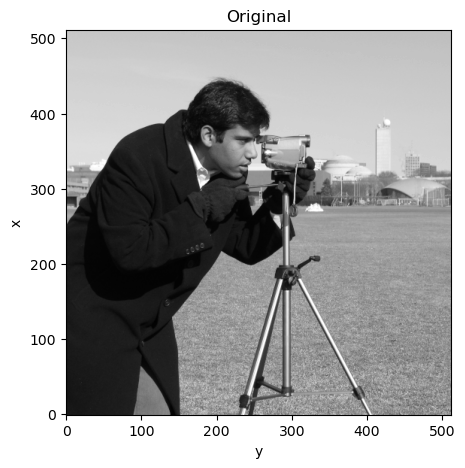

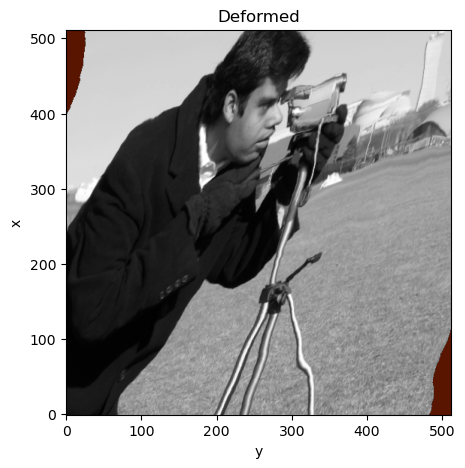

In [2]:
from matplotlib.image import imread

image_data = torch.from_numpy(imread("../tutorials/camera.png"))[None, None]
image_coordinate_system = cm.CoordinateSystem.create_centered_normalized(
    spatial_shape=image_data.shape[2:],
    voxel_size=(1.0, 1.0)
)
image = cm.samplable_volume(
    image_data,
    coordinate_system=image_coordinate_system,
)
deformed_image = image @ composition

# We flip the coordinates for visualization for the image to show correct size up
visualization_coordinates = image_coordinate_system.transform_world_with_diagonal_matrix(
    torch.tensor([-1.0, 1.0])
)
cm.visualize_to_as_image(image, target=visualization_coordinates)
plt.title("Original")
plt.show()
cm.visualize_to_as_image(deformed_image, target=visualization_coordinates)
plt.title("Deformed")
plt.show()